# 1. **Introduction**
This project analyzes Google Play Store app data to generate insights and build predictive models for app ratings. After a brief exploratory data analysis (EDA), various regression models are applied, including Linear Regression, XGBoost Regressor, Decision Tree Regressor, and Random Forest Regressor, to predict the continuous target variable—app ratings.



# **1.1 Importing Dependencies**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# **1.2 Loading the Dataset**

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_csv('googleplaystore.csv')

In [ ]:
# Display the columns quantity and names
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 10841 rows and 13 columns


# **2. Understanding the data**
- Checking null values
- Identifying duplicates
- Observations about data types




In [ ]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
print("column:")
print(df.columns)

column:
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [ ]:
# Show the main information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.duplicated().sum()

np.int64(483)

## Observation: This Dataset has Dupicate records

In [ ]:
# Display duplicated rows
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


# 2.1. Removing the duplicate records

In [ ]:
df = df.drop_duplicates(subset=['App'], keep='first')

In [ ]:
df.shape

(9660, 13)

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1463
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


## Observation: The dataset has missing values.

# **3. Data Cleaning & Feature Transformation:**
- 3.1. Transforming Categorical Features to Numerical

### Column-wise Cleaning
- Reviews
- Size
- Installs
- Price
- Category

## Handling Reviews Column

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df['Reviews'].value_counts()

,count
Reviews,
0,593
1,272
2,213
3,170
4,137
...,...
1075277,1
7529865,1
93726,1


In [ ]:
df['Reviews'].str.isnumeric().sum()

np.int64(9659)

In [ ]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop(index=10472, inplace=True)

In [ ]:
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


## Handling size Column

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df['Size'].value_counts()

,count
Size,
Varies with device,1227
11M,182
12M,181
13M,177
14M,177
...,...
860k,1
154k,1
892k,1


## Observations
- Varies with Devices
- M
- K

In [ ]:
#Finding the value haveing M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8118)

In [ ]:
#Finding the value haveing k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(314)

In [ ]:
#Finding the value haveing Varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1227)

In [ ]:
def convert_size_to_mb(size):
    if isinstance(size, str):
        size = size.strip().lower()
        if 'm' in size:
            return float(size.replace('m', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024
        elif 'varies with device' in size:
            return np.nan
    return np.nan

In [ ]:
df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

In [ ]:
df.drop(columns='Size', inplace=True)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Installs        9659 non-null   object 
 5   Type            9658 non-null   object 
 6   Price           9659 non-null   object 
 7   Content Rating  9659 non-null   object 
 8   Genres          9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Size_MB         8432 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.3+ MB


## Handeling Intsalls Column

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

## Observation:
- +
- ,

In [ ]:
df['Installs'].value_counts()

,count
Installs,
"1,000,000+",1417
"100,000+",1112
"10,000+",1031
"10,000,000+",937
"1,000+",888
100+,710
"5,000,000+",607
"500,000+",505
"50,000+",469


In [ ]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = df['Installs'].astype(int)

In [ ]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
# Creating a new column 'Installs_category' based on binned values of 'Installs'
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['No installs', 'Very Low', 'Low', 'Moderate', 'More than Moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [ ]:
 df['Installs_category'].value_counts()

,count
Installs_category,
Low,2130
High,1922
More than Moderate,1581
Very High,1544
Moderate,1499
Very Low,534
Top Notch,434
No installs,15


In [ ]:
df['Installs_category'].isnull().sum()

np.int64(0)

## Handeling Price Column

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

## Observation
- $

In [ ]:
df['Price'].loc[df['Price'].str.contains('$')].value_counts().sum()

np.int64(9659)

In [ ]:
#Lets count the number of value in 'Price' column which contain 0
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(8903)

In [ ]:
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

In [ ]:
df['Price'].value_counts()

,count
Price,
0.00,8903
0.99,145
2.99,124
1.99,73
4.99,70
...,...
3.61,1
394.99,1
1.26,1


In [ ]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
df.describe()

,Rating,Reviews,Installs,Price,Size_MB
count,8196.000000,9.659000e+03,9.659000e+03,9659.000000,8432.000000
mean,4.173243,2.165926e+05,7.777507e+06,1.099299,20.394897
std,0.536625,1.831320e+06,5.375828e+07,16.852152,21.827898
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.008301
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,4.600000
50%,4.300000,9.670000e+02,1.000000e+05,0.000000,12.000000
75%,4.500000,2.940100e+04,1.000000e+06,0.000000,28.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000


##  Handling Last updated column

In [ ]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])


In [ ]:
# Extracting features:
df['Last Updated Year'] = df['Last Updated'].dt.year
df['Last Updated Month'] = df['Last Updated'].dt.month
df['Last Updated Day'] = df['Last Updated'].dt.day

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 9659 non-null   object        
 1   Category            9659 non-null   object        
 2   Rating              8196 non-null   float64       
 3   Reviews             9659 non-null   int64         
 4   Installs            9659 non-null   int64         
 5   Type                9658 non-null   object        
 6   Price               9659 non-null   float64       
 7   Content Rating      9659 non-null   object        
 8   Genres              9659 non-null   object        
 9   Last Updated        9659 non-null   datetime64[ns]
 10  Current Ver         9651 non-null   object        
 11  Android Ver         9657 non-null   object        
 12  Size_MB             8432 non-null   float64       
 13  Installs_category   9659 non-null   category      
 

# ** 3.2. Analyzing Missing Values.**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Rating,1463
Size_MB,1227
Current Ver,8
Android Ver,2
Type,1
App,0
Installs,0
Reviews,0
Category,0
Genres,0


Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

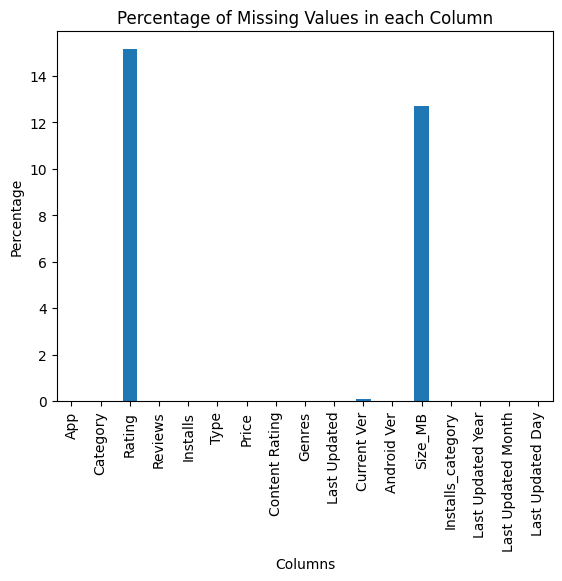

In [ ]:
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

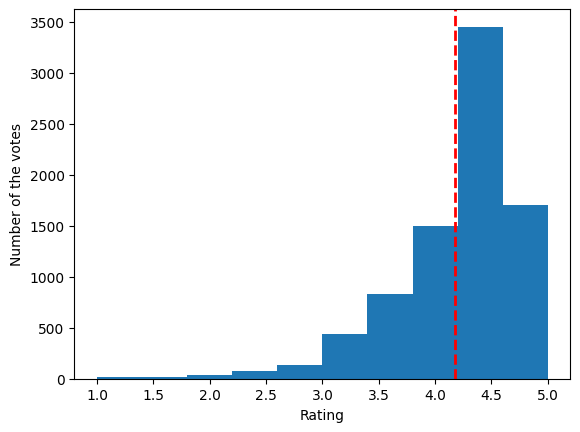

In [ ]:
# Plot histogram of the "Rating" and the "Size"

plt.hist(df["Rating"])
plt.axvline(df["Rating"].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Rating")
plt.ylabel("Number of the votes")
plt.show()

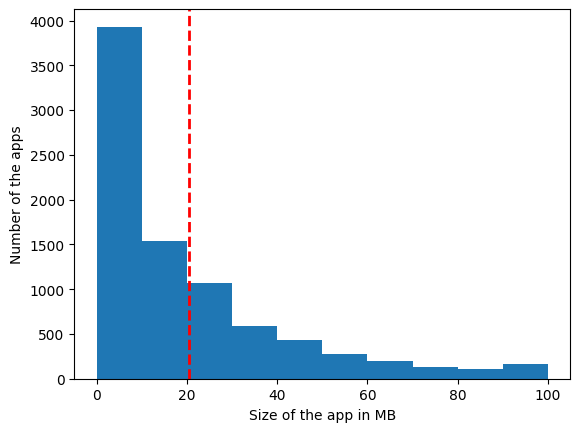

In [ ]:
plt.hist(df["Size_MB"])
plt.axvline(df["Size_MB"].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Size of the app in MB")
plt.ylabel("Number of the apps")
plt.show()

- We can see that the missing data is in two columns and it is around
  14% - 15% from the total rows. The percentage is not too high, but in order to have enough observation for better prediction models (decreasing bias) I will replace the missing values.


# **3.3. Dealing with the missing values:**
- We cannot impute the Rating column as it is directly influenced by
  Installs and Size. To validate this hypothesis, we will visualize their relationships and perform a Pearson correlation test.

In [ ]:
 df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_MB', 'Installs_category', 'Last Updated Year',
       'Last Updated Month', 'Last Updated Day'],
      dtype='object')

In [ ]:
numeric_cols = [i for i in df.columns if df[i].dtype != 'object']
numeric_cols.remove("Installs_category")

In [ ]:
numeric_cols

['Rating',
 'Reviews',
 'Installs',
 'Price',
 'Last Updated',
 'Size_MB',
 'Last Updated Year',
 'Last Updated Month',
 'Last Updated Day']

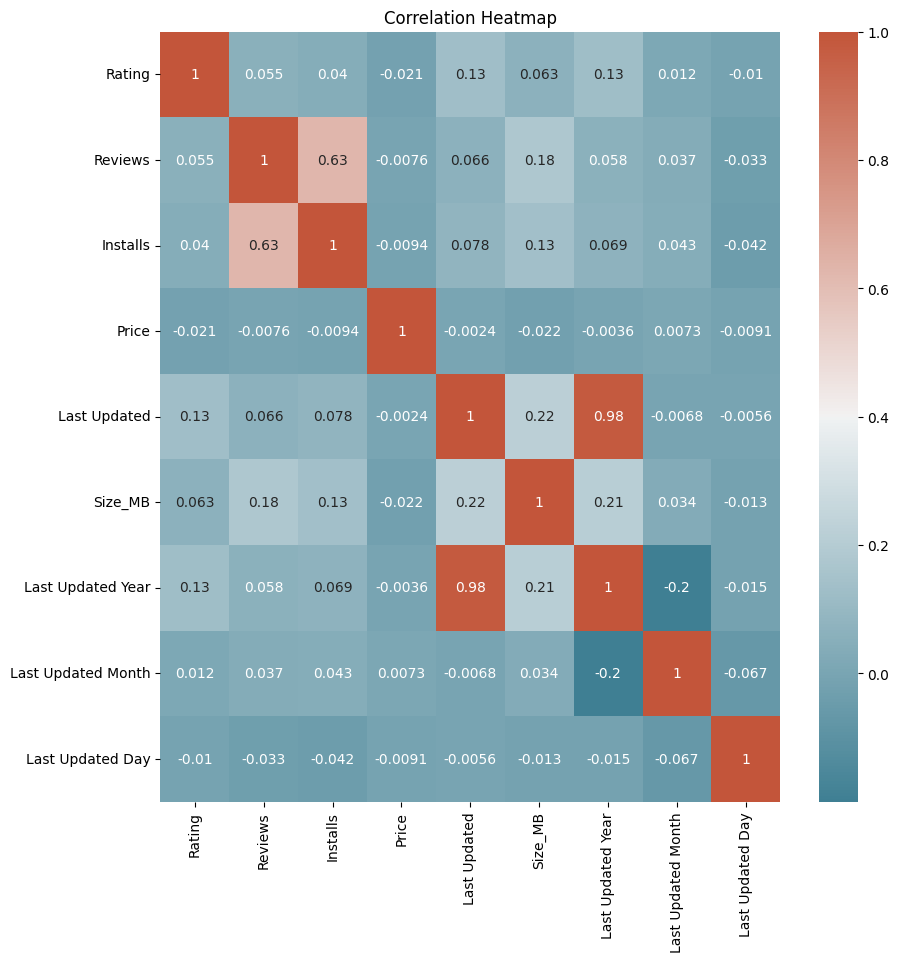

In [ ]:
# Correlation Matrix (Pearson)
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

we can calculate the pearson correlation coefficient using scipy

In [ ]:
from scipy import stats

In [ ]:
# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()
# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.5957


##  Observations
  Lighter color shows the high correlation and darker color shows the low
  correlation.

  We cansee that the Reviews column has a high correlation with the Installs
  column, which is 0.59
  according to corr(). Which is quite good

 # 3.4. Removing Unimportant Missing Values
  Before going ahead, let's remove the rows with missing values in the Current Ver, Android Ver,
  Category, Type and Genres columns, as they are very less in number and will not affect our analysis.

In [ ]:
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Rating,1458
Size_MB,1226
App,0
Reviews,0
Category,0
Type,0
Price,0
Content Rating,0
Installs,0
Genres,0


## Group Rating by Install Category

In [ ]:
 # use groupby function to find the trend of Rating in each Installs_category
 df.groupby('Installs_category')['Rating'].describe()

<ipython-input-62-b5b8ea6725f5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Installs_category')['Rating'].describe()


,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
No installs,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very Low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1254.0,4.169617,0.829616,1.0,3.8,4.4,4.8,5.0
Moderate,1410.0,4.031560,0.605854,1.4,3.8,4.2,4.5,5.0
More than Moderate,1550.0,4.095484,0.501610,1.6,3.9,4.2,4.5,4.9
High,1917.0,4.203860,0.381591,1.8,4.0,4.3,4.5,4.9
Very High,1544.0,4.271049,0.309072,2.0,4.1,4.3,4.5,4.9
Top Notch,434.0,4.353456,0.215453,3.1,4.2,4.4,4.5,4.8


In [ ]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

,count
Installs_category,
Low,873
Very Low,452
Moderate,86
More than Moderate,30
No installs,14
High,3
Very High,0
Top Notch,0


Text(7, 3.5, 'Null: 0')

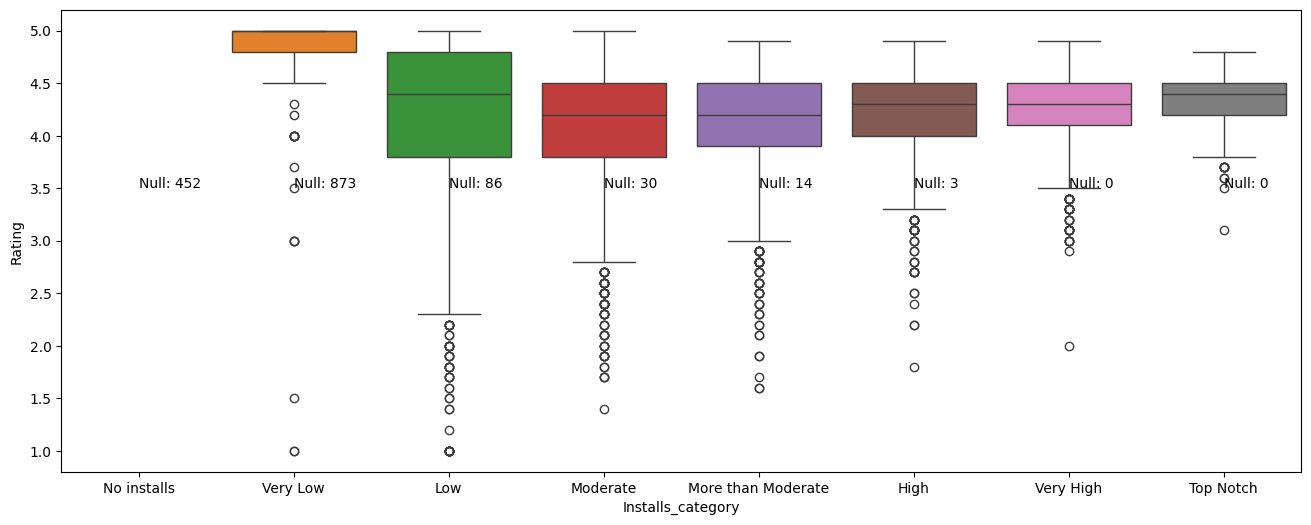

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df, dodge=False)

# Null value annotations
plt.text(0, 3.5, 'Null: 452')   # Very Low
plt.text(1, 3.5, 'Null: 873')   # Low
plt.text(2, 3.5, 'Null: 86')    # Moderate
plt.text(3, 3.5, 'Null: 30')    # More than Moderate
plt.text(4, 3.5, 'Null: 14')    # No installs
plt.text(5, 3.5, 'Null: 3')     # High
plt.text(6, 3.5, 'Null: 0')     # Very High
plt.text(7, 3.5, 'Null: 0')     # Top Notch

In [ ]:
df['Installs_category'].unique()

['Moderate', 'High', 'Very High', 'Top Notch', 'More than Moderate', 'Low', 'Very Low', 'No installs']
Categories (8, object): ['No installs' < 'Very Low' < 'Low' < 'Moderate' < 'More than Moderate' < 'High' <
                         'Very High' < 'Top Notch']

In [ ]:
def fill_missing_ratings(df, category, fill_value):
 # Filter the DataFrame for rows where the category matches and rating is missing
 filtered_df = df[(df['Installs_category'] == category) & df['Rating'].isnull()]
# Fill the missing values with the specified value
 df.loc[filtered_df.index, 'Rating'] = fill_value
 return df

In [ ]:
df = fill_missing_ratings(df, 'Low', 4.170970)
df = fill_missing_ratings(df, 'Very Low', 4.637037)
df = fill_missing_ratings(df, 'Moderate', 4.035417)
df = fill_missing_ratings(df, 'More than Moderate', 4.093255)
df = fill_missing_ratings(df, 'High', 4.207525)
df = fill_missing_ratings(df, 'No installs', 0)

In [ ]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

,count
Installs_category,
No installs,0
Very Low,0
Low,0
Moderate,0
More than Moderate,0
High,0
Very High,0
Top Notch,0


In [ ]:
 df['Rating'].isnull().sum()

np.int64(0)

## 3.4. Fill NaN values in Size_MB with median size per Category

In [ ]:
df['Size_MB'] = df.groupby('Category')['Size_MB'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df['Size_MB'].value_counts()

,count
Size_MB,
12.000000,261
11.000000,255
19.000000,235
15.000000,220
13.000000,177
...,...
0.539062,1
0.864258,1
0.996094,1


## Observation
  the Size_MB column contained missing values due to entries like "Varies with device." To handle these missing values more meaningfully, I filled them using the median app size within each Category. This approach ensures that the imputed size values are representative of the app's type and usage, leading to more accurate analysis compared to using a global median.

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0
Last Updated,0


In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_category,Last Updated Year,Last Updated Month,Last Updated Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,Moderate,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,High,2018,1,15


In [ ]:
df.describe()

,Rating,Reviews,Installs,Price,Last Updated,Size_MB,Last Updated Year,Last Updated Month,Last Updated Day
count,9648.000000,9.648000e+03,9.648000e+03,9648.000000,9648,9648.000000,9648.000000,9648.000000,9648.000000
mean,4.187310,2.168369e+05,7.786211e+06,1.100193,2017-10-31 01:00:08.955223808,19.454588,2017.346186,6.365464,15.633706
min,0.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00,0.008301,2010.000000,1.000000,1.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,2017-08-07 18:00:00,5.100000,2017.000000,5.000000,7.000000
50%,4.200000,9.690000e+02,1.000000e+05,0.000000,2018-05-05 00:00:00,11.000000,2018.000000,7.000000,16.000000
75%,4.500000,2.944925e+04,1.000000e+06,0.000000,2018-07-17 00:00:00,26.000000,2018.000000,8.000000,24.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00,100.000000,2018.000000,12.000000,31.000000
std,0.529009,1.832349e+06,5.378830e+07,16.861727,NaN,20.767589,1.137109,2.659280,9.430522


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 9648 non-null   object        
 1   Category            9648 non-null   object        
 2   Rating              9648 non-null   float64       
 3   Reviews             9648 non-null   int64         
 4   Installs            9648 non-null   int64         
 5   Type                9648 non-null   object        
 6   Price               9648 non-null   float64       
 7   Content Rating      9648 non-null   object        
 8   Genres              9648 non-null   object        
 9   Last Updated        9648 non-null   datetime64[ns]
 10  Current Ver         9648 non-null   object        
 11  Android Ver         9648 non-null   object        
 12  Size_MB             9648 non-null   float64       
 13  Installs_category   9648 non-null   category      
 

 # **4. Exploratory Data Analysis (EDA).**
- Distribution of ratings
- Relationship between installs and ratings
- Monthly app updates & average rating over time


## Separating Numerical and Categorical Columns

In [ ]:
numeric_features = df.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print('We have {} numerical features:\n{}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features:\n{}'.format(len(categorical_features), categorical_features))


We have 8 numerical features:
['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB', 'Last Updated Year', 'Last Updated Month', 'Last Updated Day']

We have 7 categorical features:
['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [ ]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
Cardio-FR                                             0.010365
List iptv FR                                          0.010365
PLMGSS FR                                             0.010365
Poop FR                                               0.010365
Fr. Daoud Lamei                                       0.010365
                                                        ...   
Pixel Draw - Number Art Coloring Book                 0.010365
Sketch - Draw & Paint                                 0.010365
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010365
Coloring book moana                                   0.010365
Photo Editor & Candy Camera & Grid & ScrapBook        0.010365
Name: proportion, Length: 9648, dtype: float64
---------------------------
Category
FAMILY                 18.946932
GAME                    9.939884
TOOLS                   8.550995
BUSINESS                4.353234
MEDICAL                 4.094113
PRODUCTIVITY            3.876451
PERSONALIZATION      

## 4.1 Univariate Analysis

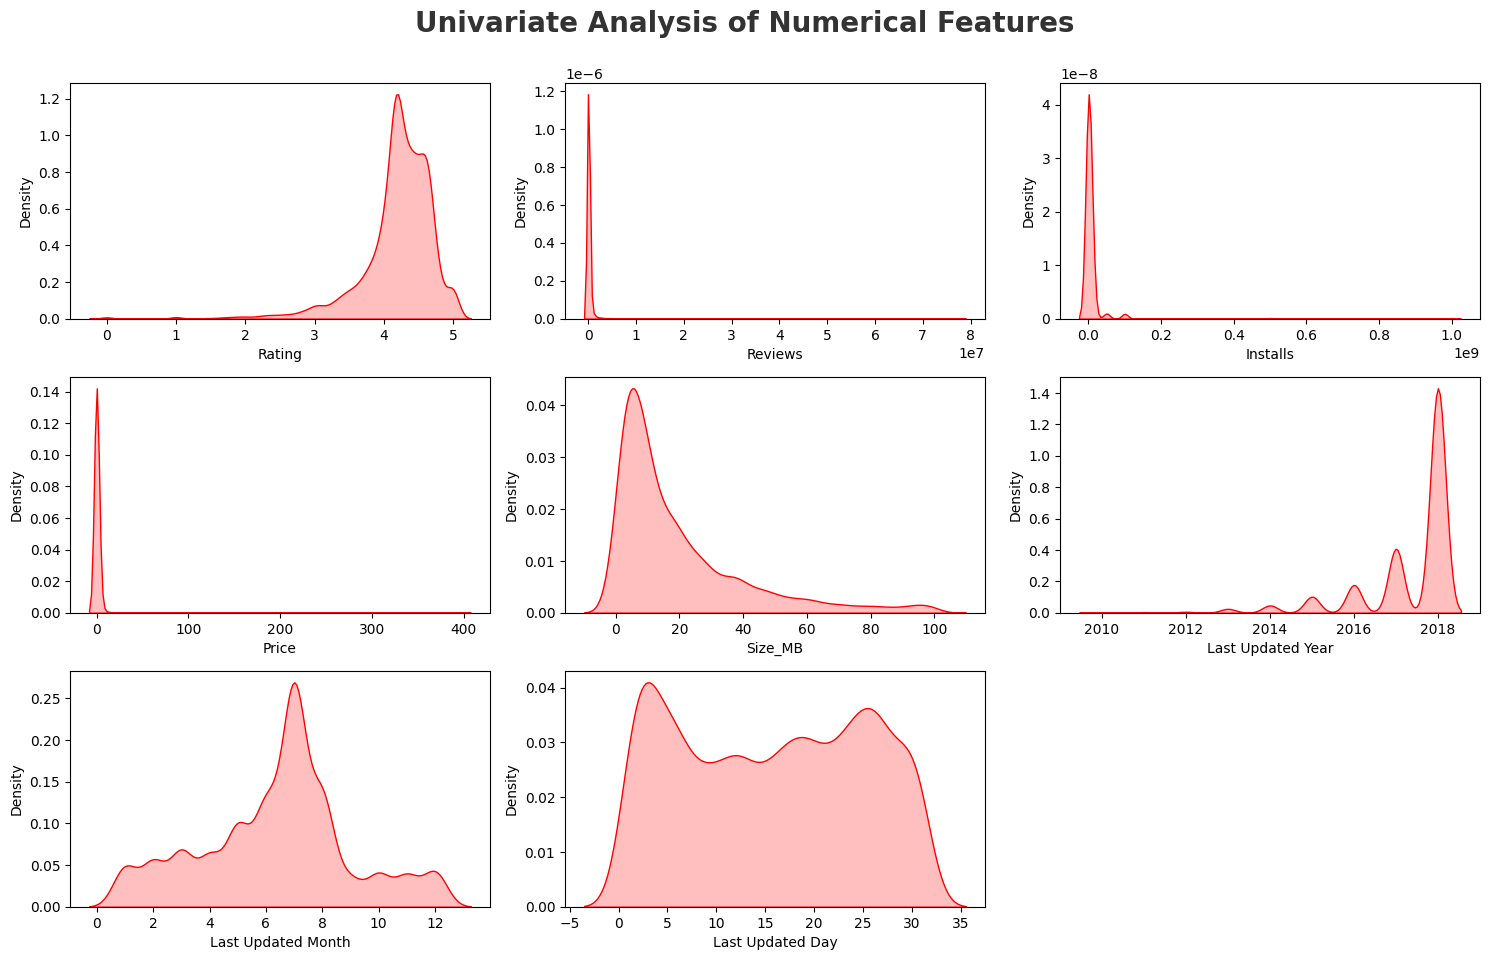

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], fill=True, color='r')  # use fill=True
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

<ipython-input-79-a2dc3665da27>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_ratings.index, y=content_ratings.values, palette='coolwarm')


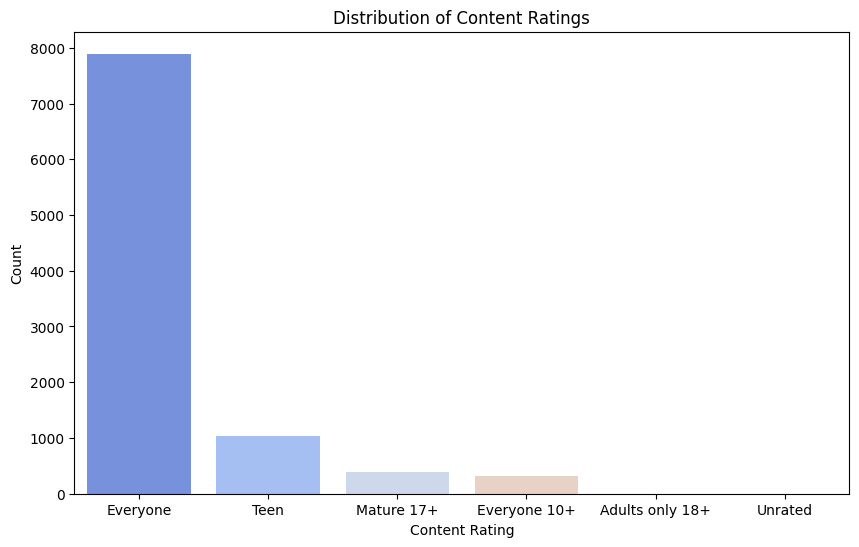

In [ ]:
# Distribution of Content Ratings

plt.figure(figsize=(10,6))
content_ratings = df['Content Rating'].value_counts()
sns.barplot(x=content_ratings.index, y=content_ratings.values, palette='coolwarm')
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-80-b039228d0646>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')


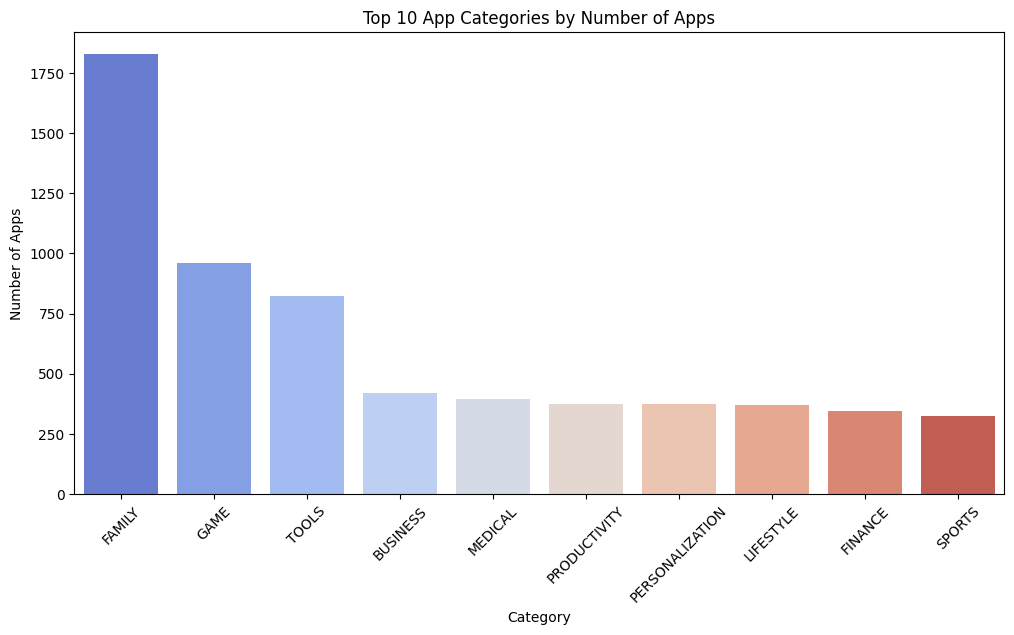

In [ ]:
# Top 10 Categories by Number of Apps

plt.figure(figsize=(12,6))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')
plt.title('Top 10 App Categories by Number of Apps')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

<ipython-input-81-72490e73fd68>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set1')


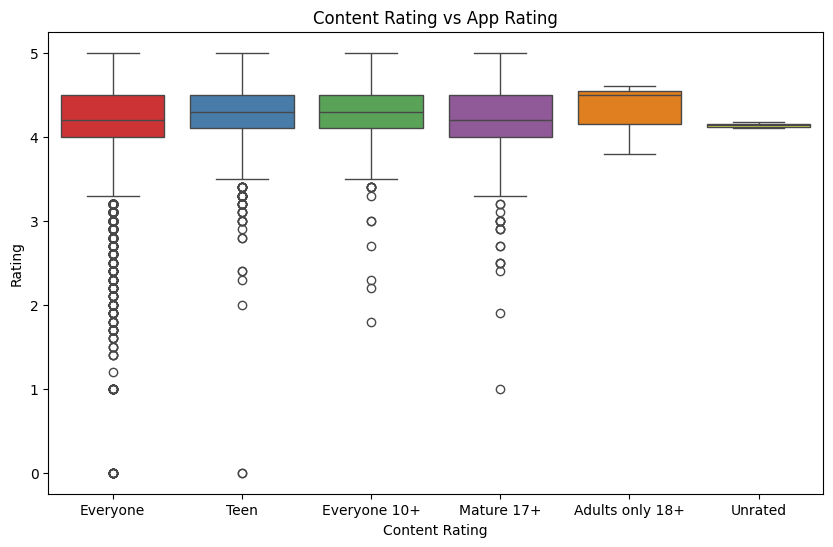

In [ ]:
# Content Rating vs Rating

plt.figure(figsize=(10,6))
sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set1')
plt.title('Content Rating vs App Rating')
plt.show()

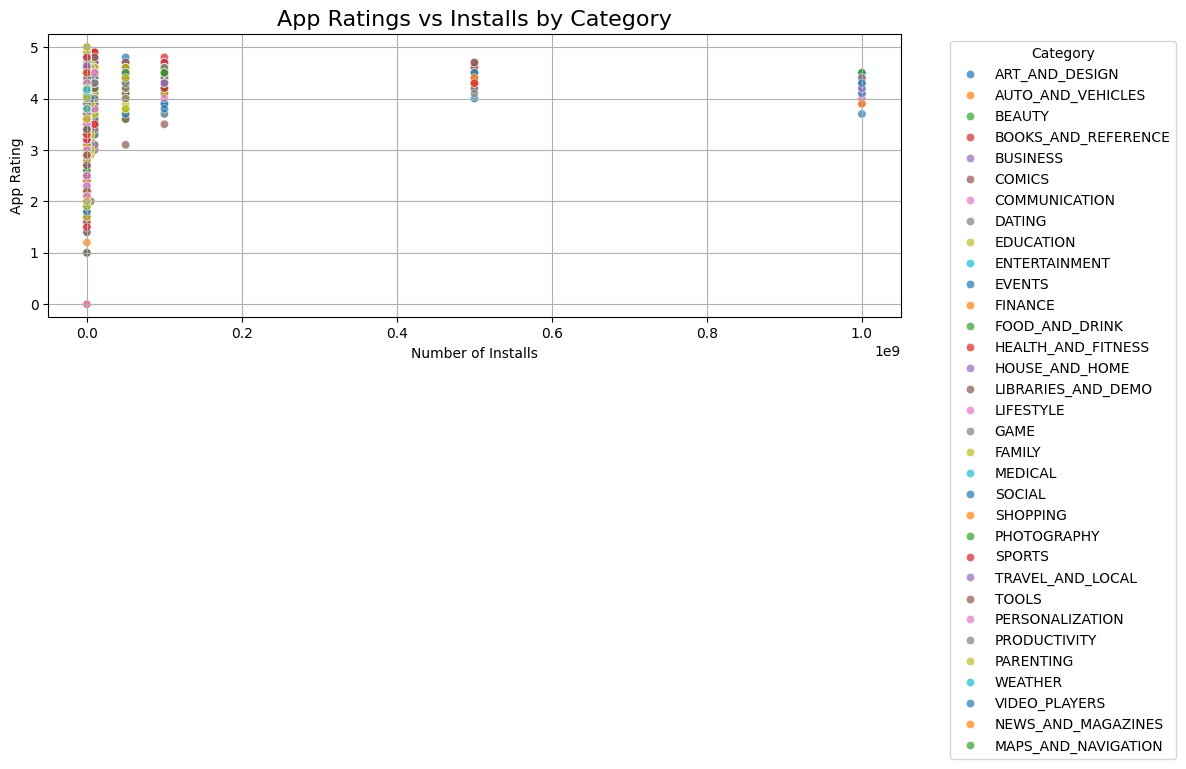

In [ ]:
# Relationship between Installs ,Rating and Category

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Installs',
    y='Rating',
    hue='Category',
    data=df,
    palette='tab10',
    alpha=0.7
)

plt.title('App Ratings vs Installs by Category', fontsize=16)
plt.xlabel('Number of Installs')
plt.ylabel('App Rating')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.2 Price Analysis

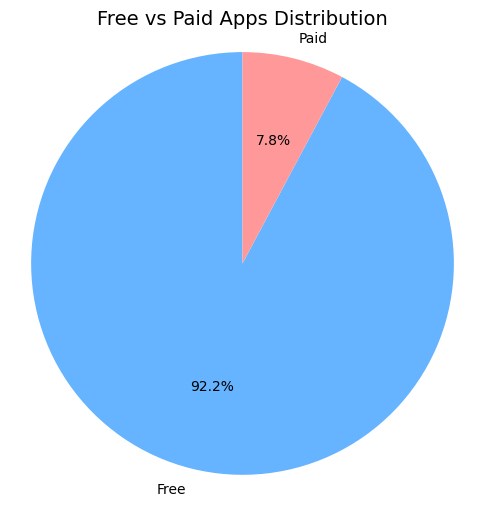

In [ ]:
# Count of free vs paid apps
type_counts = df['Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Free vs Paid Apps Distribution', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()

## 4.3 Content Rating Analysis

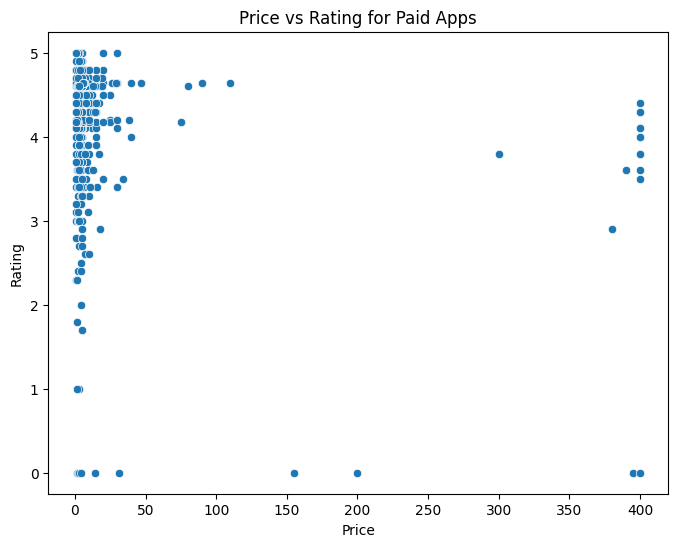

In [ ]:
# Relationship Between Price and Rating
paid_apps = df[df['Type'] == 'Paid'] # Filter for paid apps

plt.figure(figsize=(8,6))
sns.scatterplot(x='Price', y='Rating', data=paid_apps)
plt.title('Price vs Rating for Paid Apps')
plt.show()

<ipython-input-85-20a613a1d14b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_ratings.index, y=mean_ratings.values, palette='coolwarm')


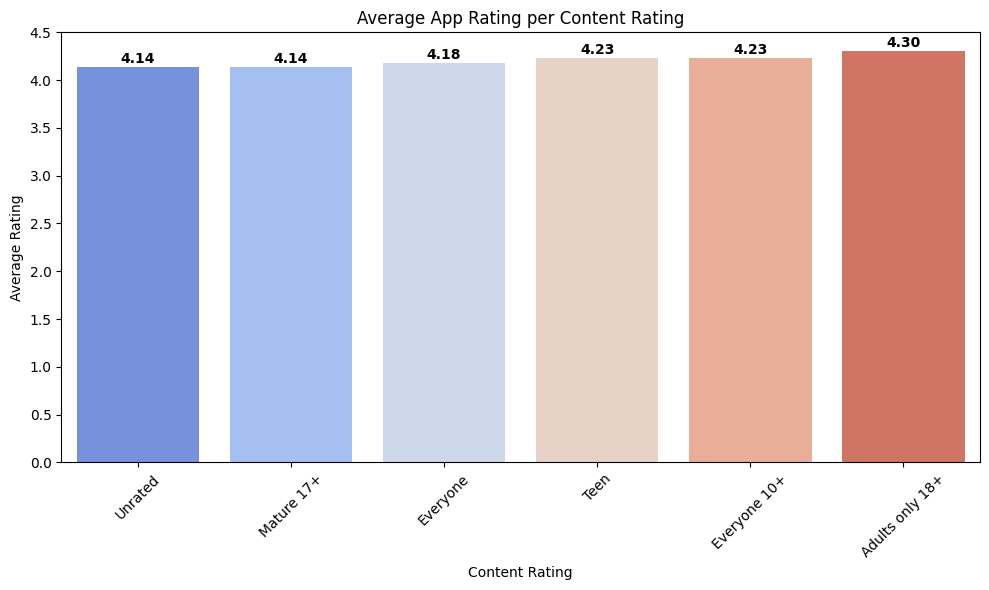

In [ ]:
# Average app rating per Content


plt.figure(figsize=(10, 6))
mean_ratings = df.groupby('Content Rating')['Rating'].mean().sort_values()
ax = sns.barplot(x=mean_ratings.index, y=mean_ratings.values, palette='coolwarm')

# Add value labels
for i, v in enumerate(mean_ratings.values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.title('Average App Rating per Content Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, max(mean_ratings.values) + 0.2)
plt.tight_layout()
plt.show()

<ipython-input-86-95903e79742d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_installs.index, y=top_genres_installs.values, palette='Spectral')


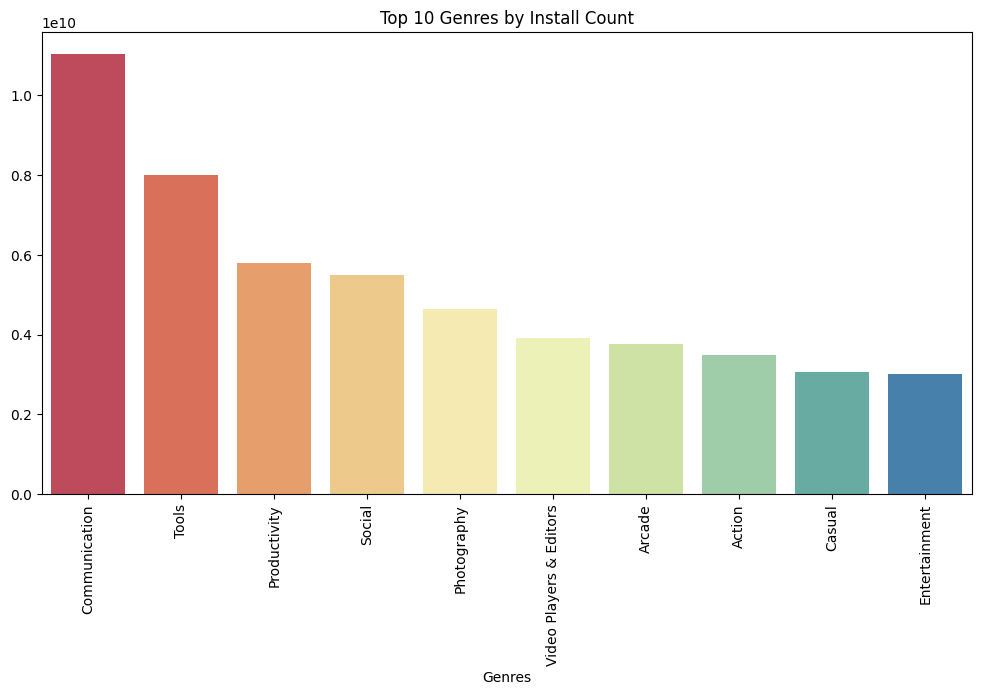

In [ ]:
# Top Genres by Install Count

plt.figure(figsize=(12,6))
top_genres_installs = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres_installs.index, y=top_genres_installs.values, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Top 10 Genres by Install Count')
plt.show()

# **5. Outlier Handeling**

# 5.1 Handle Outliers Using Capping (Only for Skewed Columns)

In [ ]:
# Function to cap outliers based on percentiles
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower, upper)
    print(f"{column} capped between {lower:.2f} and {upper:.2f}")
    return df

# Apply capping on columns with visible outliers
df = cap_outliers(df, 'Size_MB')
df = cap_outliers(df, 'Price')


Size_MB capped between 0.22 and 95.00
Price capped between 0.00 and 8.99


# Log Transform Skewed Numerical Columns

In [ ]:
import numpy as np

# Apply log transformation on highly right-skewed columns
df['Reviews'] = np.log1p(df['Reviews'])
df['Installs'] = np.log1p(df['Installs'])
df['Price'] = np.log1p(df['Price'])
df['Size_MB'] = np.log1p(df['Size_MB'])


# Check Distributions After Capping and Log Transform

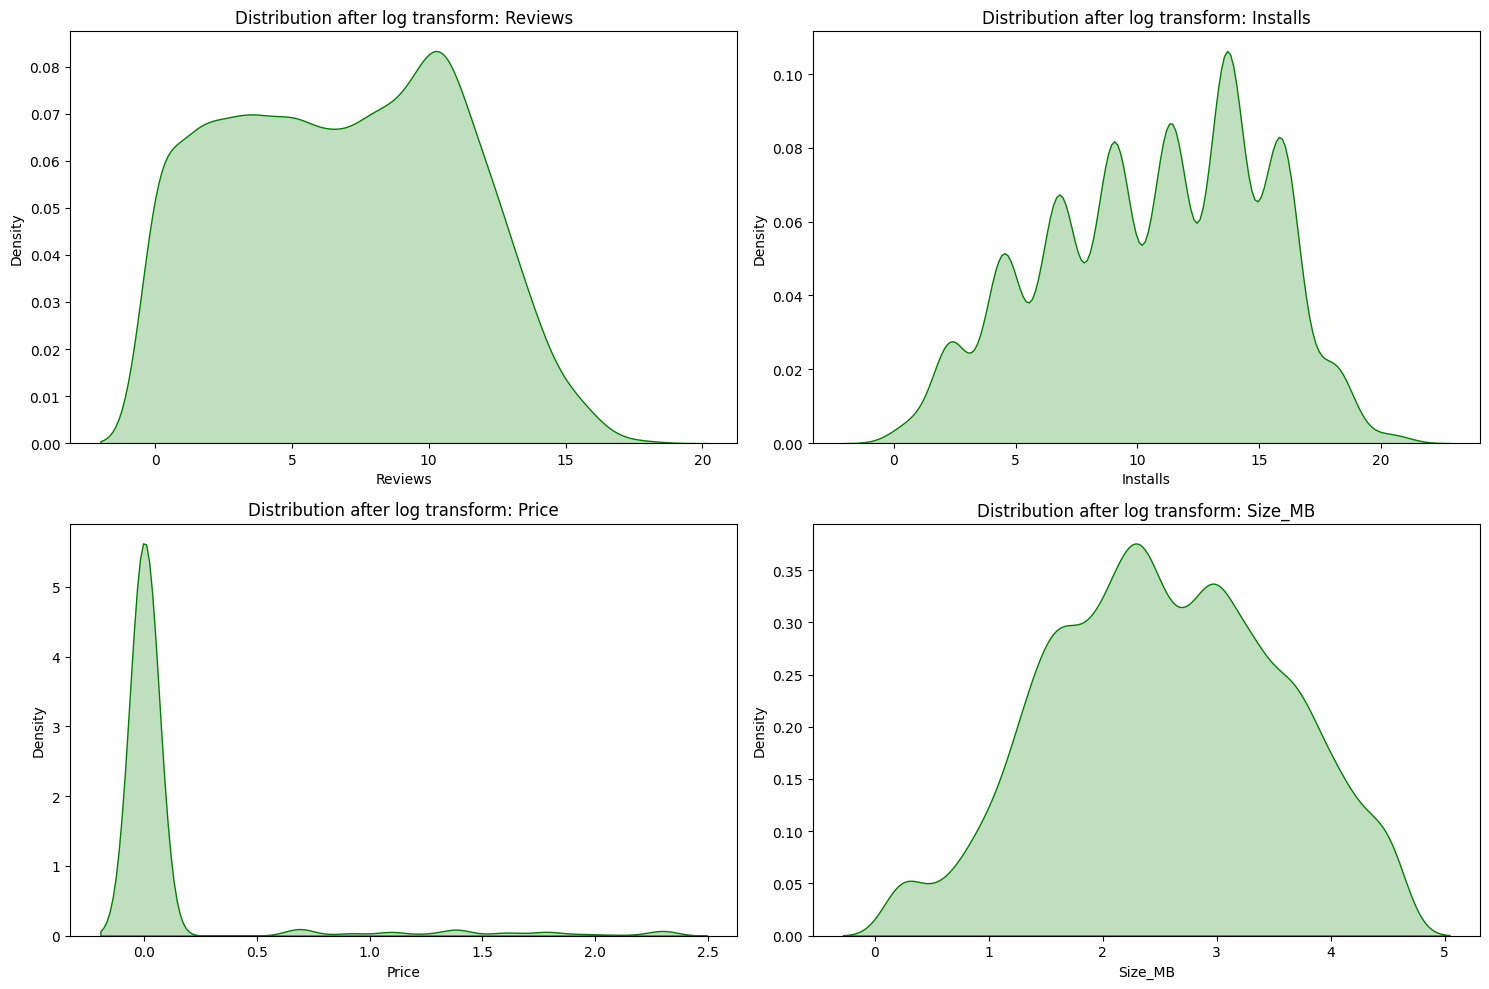

In [ ]:
# Optional visualization to confirm effects
import matplotlib.pyplot as plt
import seaborn as sns

log_cols = ['Reviews', 'Installs', 'Price', 'Size_MB']

plt.figure(figsize=(15, 10))
for i, col in enumerate(log_cols):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(df[col], fill=True, color='green')
    plt.title(f'Distribution after log transform: {col}')
plt.tight_layout()
plt.show()


# 5.2 Conclusion:
- Capping and log transformation are effective strategies for handling outliers
  in a dataset. By implementing these methods, we can ensure that our predictive models are not unduly influenced by extreme values, leading to better generalization and more accurate predictions. It is important to carefully consider the nature of the data and the problem at hand to decide which technique is most appropriate.





# **6. Insights from Data**

## - 6.1  Which category has the highest number of apps

<ipython-input-90-741fdb27427a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')


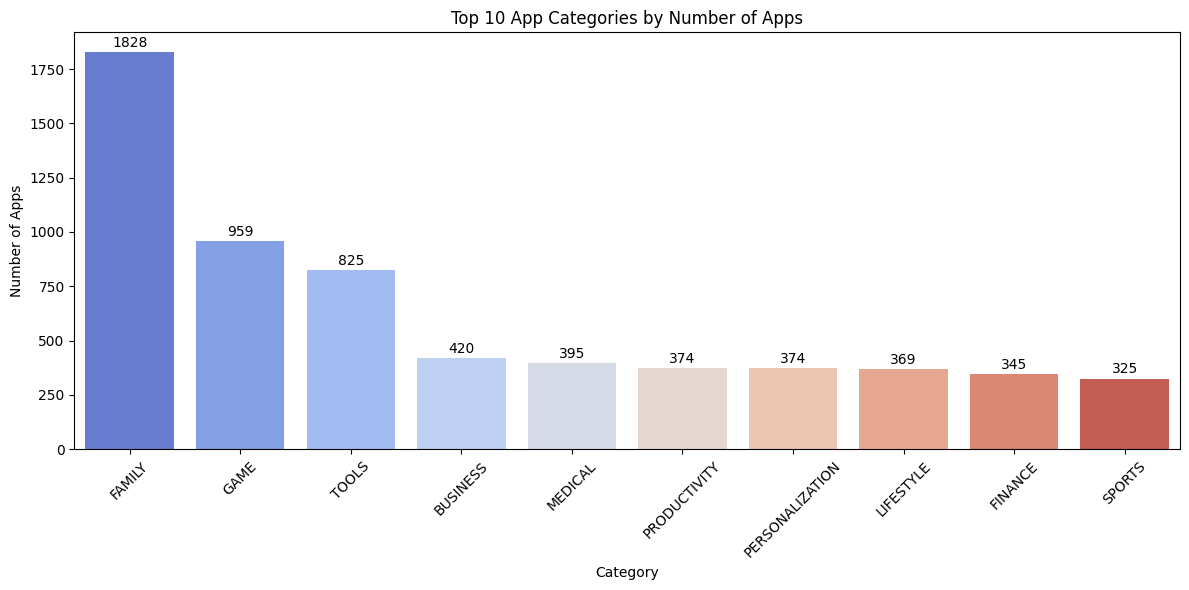

In [ ]:
plt.figure(figsize=(12,6))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')

# Adding labels
for i, value in enumerate(top_categories.values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.title('Top 10 App Categories by Number of Apps')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6.2 Which category has the highest number of installs

<ipython-input-91-0b580771b261>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_installs.head(10).index, y=category_installs.head(10).values, palette='viridis')


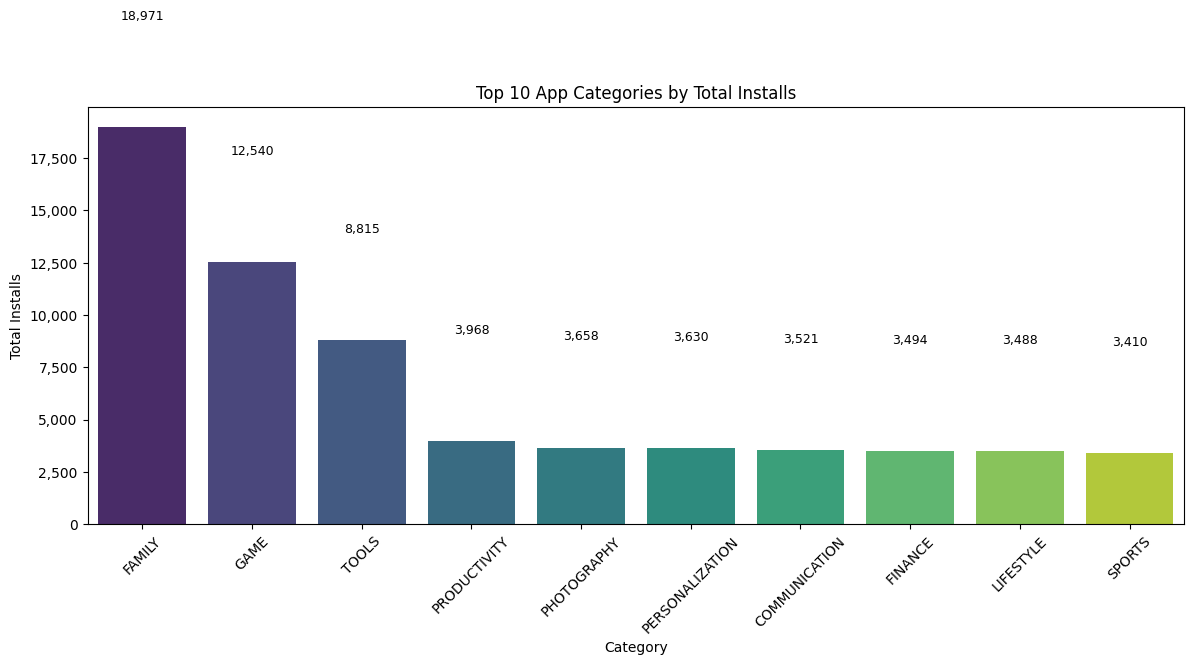

In [ ]:
from matplotlib.ticker import FuncFormatter

# Define total installs per category
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Plot with labels
plt.figure(figsize=(12,6))
ax = sns.barplot(x=category_installs.head(10).index, y=category_installs.head(10).values, palette='viridis')
plt.title('Top 10 App Categories by Total Installs')
plt.ylabel('Total Installs')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Format y-axis labels with commas instead of scientific notation
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Add text labels on top of bars, closer to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5000, f'{int(height):,}', ha="center", va="bottom", fontsize=9)

plt.show()


## 6.3 Which category has the highest number of reviews

Category with the highest total number of reviews:
Category
FAMILY    11921.93487
Name: Reviews, dtype: float64


<ipython-input-92-46fe43cf573f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_reviews.head(10).index, y=category_reviews.head(10).values, palette='plasma')


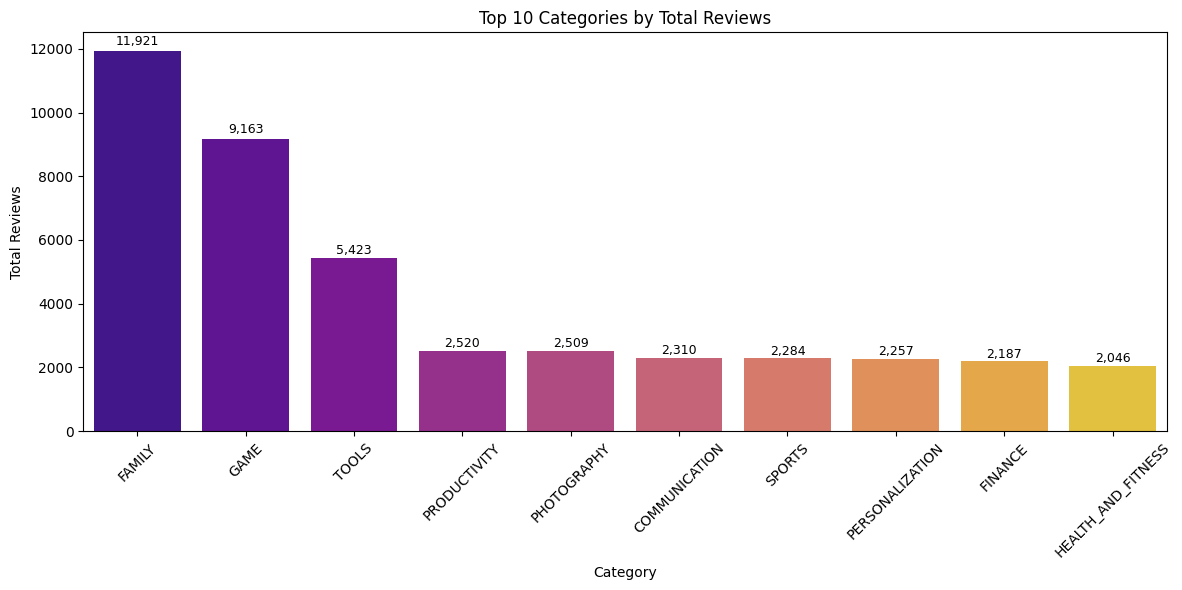

In [ ]:
category_reviews = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)

# Display the top category
print("Category with the highest total number of reviews:")
print(category_reviews.head(1))

# Plot Top 10 Categories by Total Reviews
plt.figure(figsize=(12,6))
ax = sns.barplot(x=category_reviews.head(10).index, y=category_reviews.head(10).values, palette='plasma')
plt.title('Top 10 Categories by Total Reviews')
plt.ylabel('Total Reviews')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on bars (with better placement)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + height * 0.01, f'{int(height):,}',
            ha="center", va='bottom', fontsize=9)

plt.show()

Category with the highest total number of reviews:
Category
FAMILY    11921.93487
Name: Reviews, dtype: float64


<ipython-input-93-c9576646b0cf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_reviews.head(10).index, y=category_reviews.head(10).values, palette='plasma')


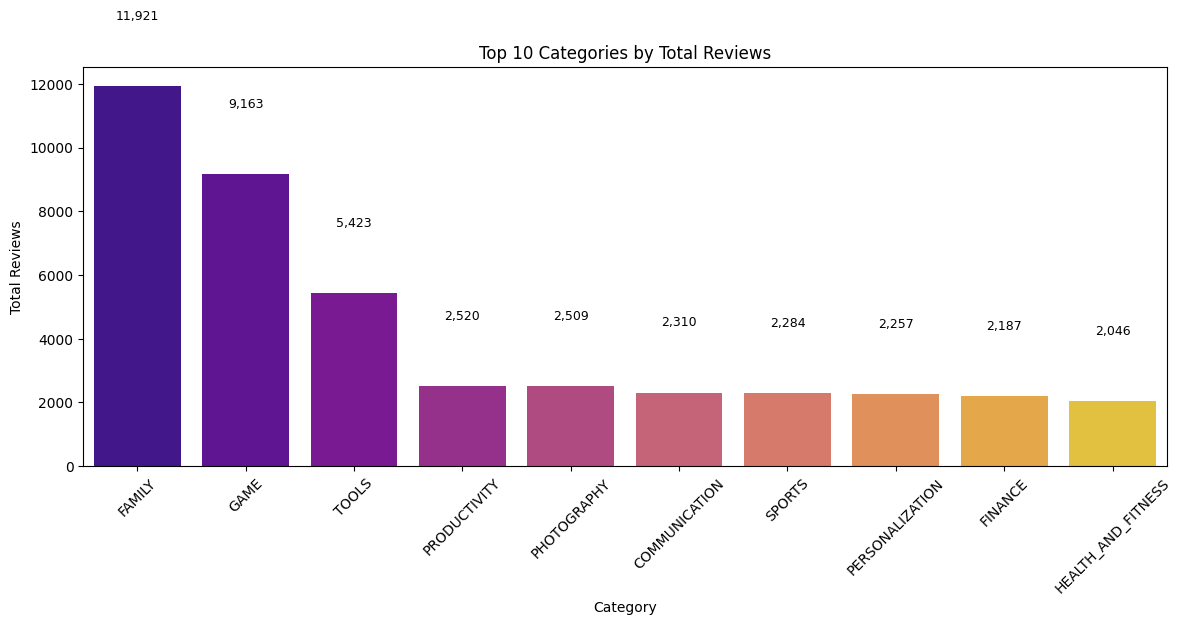

In [ ]:
category_reviews = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)

# Display the top category
print("Category with the highest total number of reviews:")
print(category_reviews.head(1))

# Plot Top 10 Categories by Total Reviews
plt.figure(figsize=(12,6))
ax = sns.barplot(x=category_reviews.head(10).index, y=category_reviews.head(10).values, palette='plasma')
plt.title('Top 10 Categories by Total Reviews')
plt.ylabel('Total Reviews')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on bars, closer to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2000, f'{int(height):,}', ha="center", va="bottom", fontsize=9)

plt.show()

## 6.4 Which category has the highest rating?

<ipython-input-94-e8b1d80e2435>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=highest_rated_category.head(10).index, y=highest_rated_category.head(10).values, palette='crest')


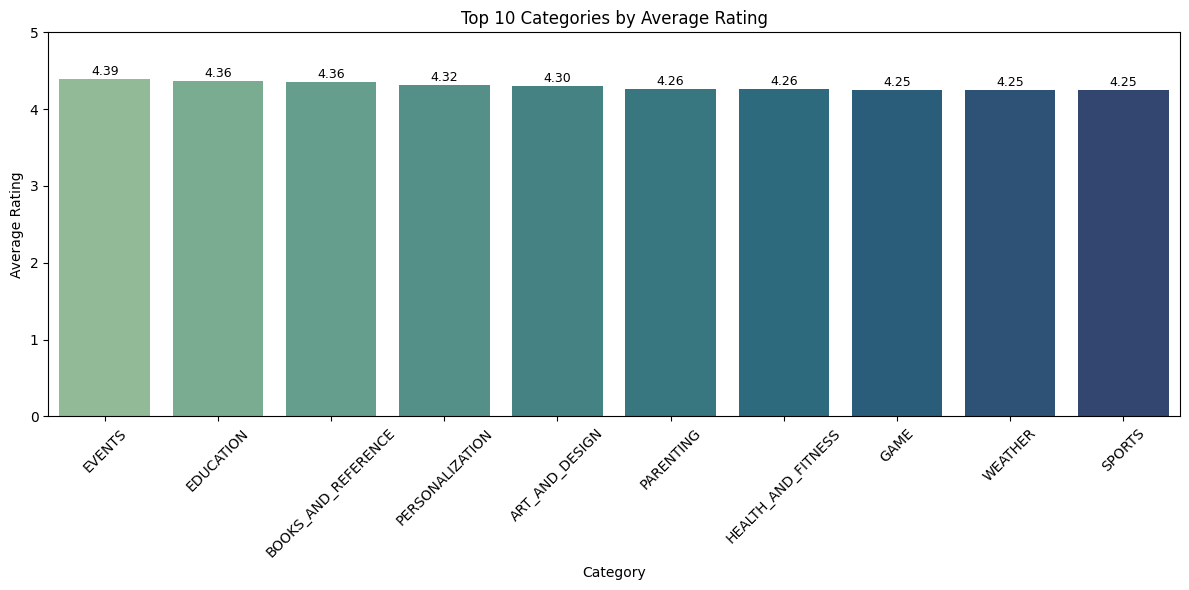

In [ ]:
# Group by category and calculate average rating
highest_rated_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,6))
ax = sns.barplot(x=highest_rated_category.head(10).index, y=highest_rated_category.head(10).values, palette='crest')
plt.title('Top 10 Categories by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Rating is between 0 and 5

# Add text labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.05, f'{height:.2f}', ha="center", fontsize=9)

plt.tight_layout()
plt.show()


# **7. Sentiment Analysis of User Reviews**
- Goal: To analyze the emotional tone of user reviews (positive,
  negative, neutral)

In [ ]:
df_reviews = pd.read_csv('googleplaystore_user_reviews.csv')


In [ ]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_reviews.shape

(64295, 5)

## 7.1 summary of the Data

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
df_reviews.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


 # 7.2 Drop rows where review or sentiment data is missing

In [ ]:
df_reviews = df_reviews.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

# Check new shape
print(df_reviews.shape)

(37427, 5)


<ipython-input-102-c4d59662d992>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='Sentiment', palette='Set2')


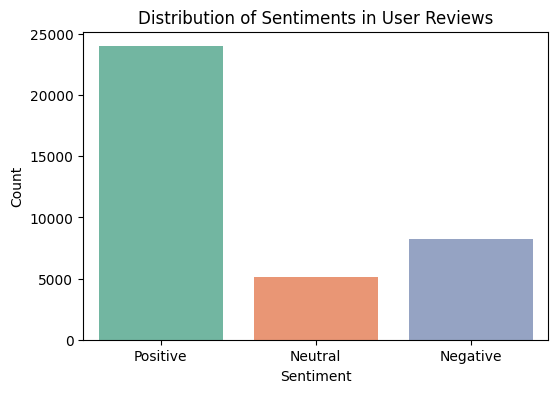

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_reviews, x='Sentiment', palette='Set2')
plt.title('Distribution of Sentiments in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

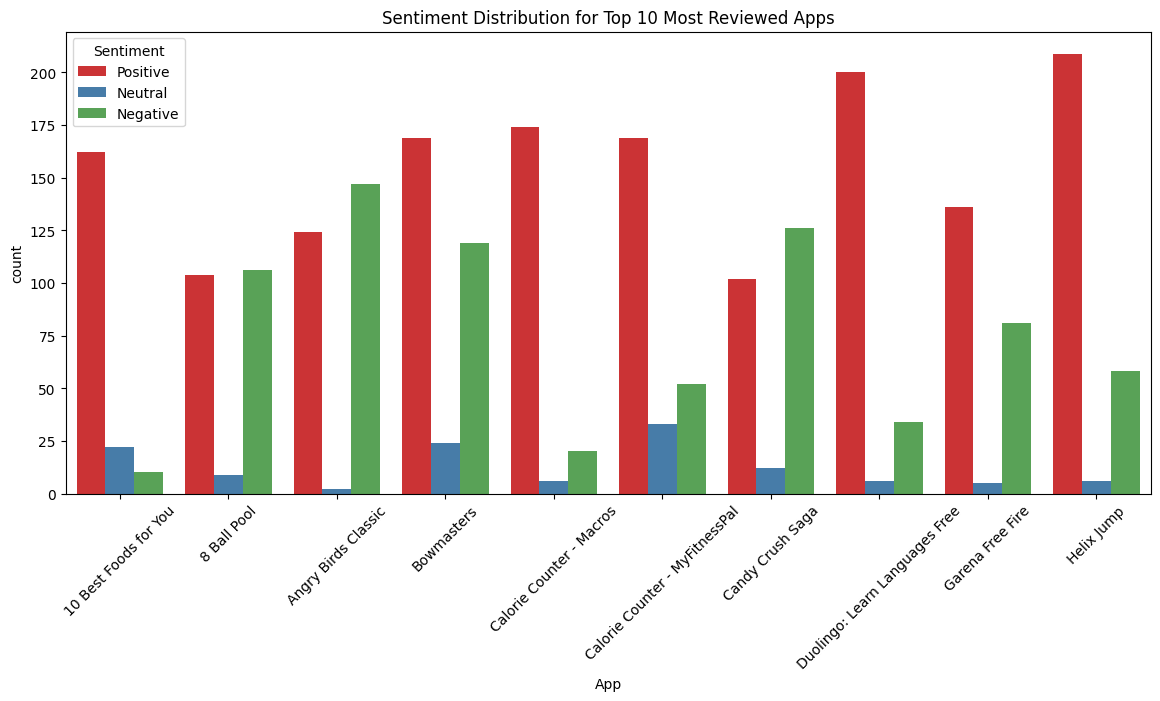

In [ ]:
top_apps = df_reviews['App'].value_counts().head(10).index
df_top_apps = df_reviews[df_reviews['App'].isin(top_apps)]

plt.figure(figsize=(14,6))
sns.countplot(data=df_top_apps, x='App', hue='Sentiment', palette='Set1')
plt.title('Sentiment Distribution for Top 10 Most Reviewed Apps')
plt.xticks(rotation=45)
plt.show()

# **8. Timeseries analysis of app updates and their impact on ratings.**

In [ ]:
yearly_avg_rating = df.groupby('Last Updated Year')['Rating'].mean()

# 8.1 Average Rating over Years

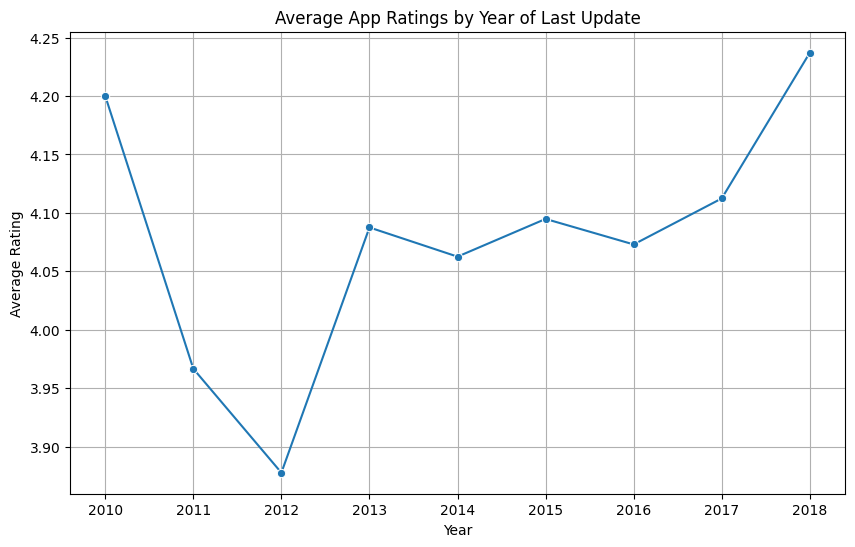

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_avg_rating.index, y=yearly_avg_rating.values, marker='o')
plt.title('Average App Ratings by Year of Last Update')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


# 8.2 Number of App Updates per Year

<ipython-input-106-477f151312e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=apps_per_year.index, y=apps_per_year.values, palette='crest')


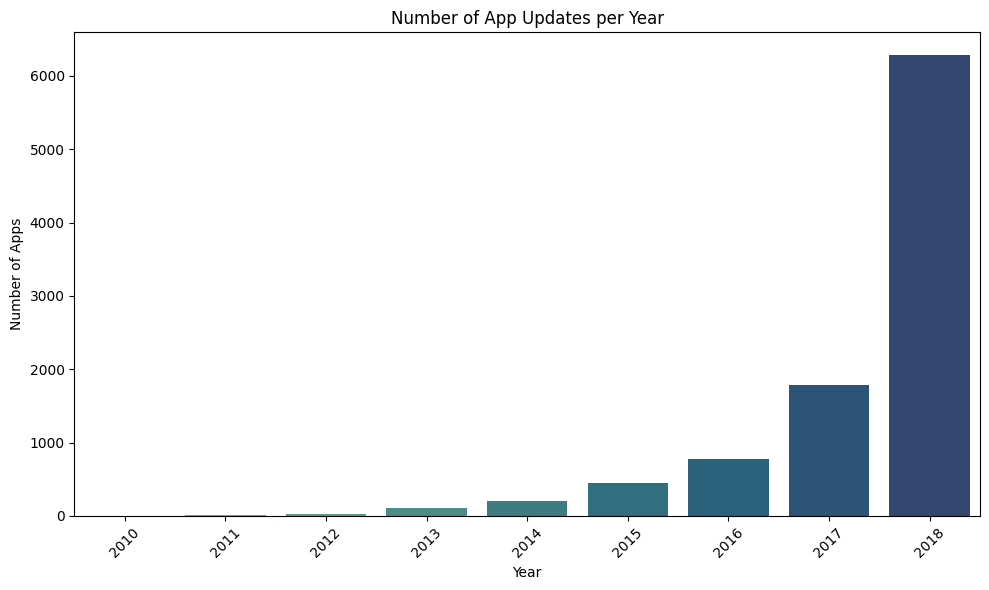

In [ ]:
apps_per_year = df['Last Updated Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=apps_per_year.index, y=apps_per_year.values, palette='crest')
plt.title('Number of App Updates per Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8.3 Scatter: Updates vs Average Ratings

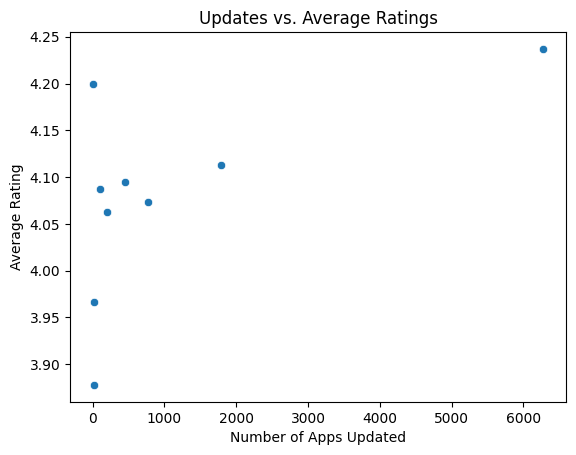

In [ ]:
update_rating_df = pd.DataFrame({
    'Number of Updates': apps_per_year,
    'Average Rating': yearly_avg_rating
}).dropna()

sns.scatterplot(data=update_rating_df, x='Number of Updates', y='Average Rating')
plt.title('Updates vs. Average Ratings')
plt.xlabel('Number of Apps Updated')
plt.ylabel('Average Rating')
plt.show()

# 8.4 Monthly Average Rating Over Time

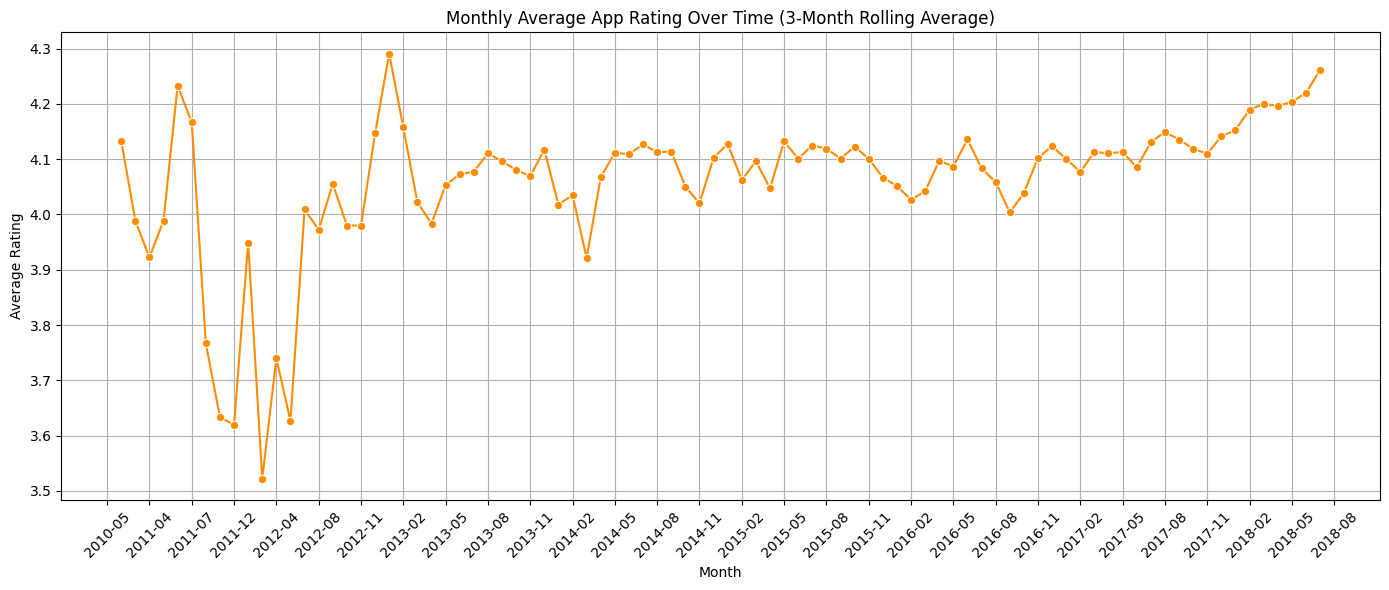

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Extract Year-Month and compute monthly average ratings
df['YearMonth'] = df['Last Updated'].dt.to_period('M')
monthly_avg_rating = df.groupby('YearMonth')['Rating'].mean().reset_index()
monthly_avg_rating['YearMonth'] = monthly_avg_rating['YearMonth'].astype(str)

# Apply 3-month rolling average to smoothen the trend
monthly_avg_rating['RollingAvg'] = monthly_avg_rating['Rating'].rolling(window=3, center=True).mean()

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg_rating, x='YearMonth', y='RollingAvg', marker='o', color='darkorange')
plt.title('Monthly Average App Rating Over Time (3-Month Rolling Average)')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(ticks=range(0, len(monthly_avg_rating), 3), labels=monthly_avg_rating['YearMonth'][::3], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 8.5 Number of App Updates per Month

<ipython-input-109-e177f56a915c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year-Month', y='Update Count', data=filtered_monthly_counts_df, palette='mako')


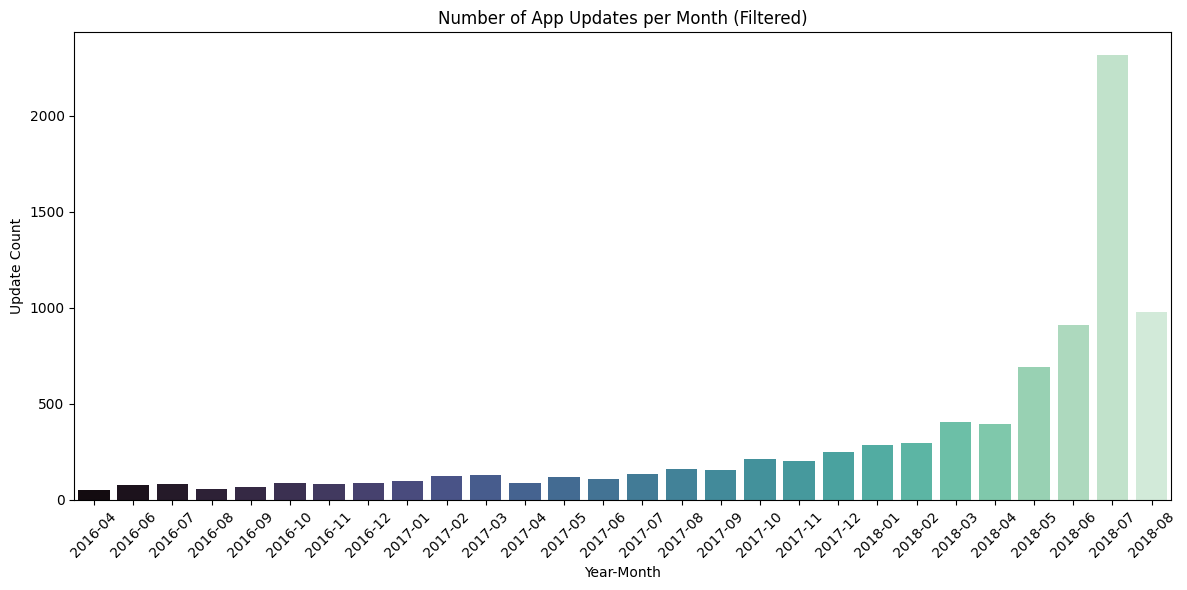

In [ ]:
monthly_counts = df.groupby(['Last Updated Year', 'Last Updated Month']).size()

# Reset index and convert to DataFrame
monthly_counts_df = monthly_counts.reset_index(name='Update Count')

# Format Year-Month for x-axis
monthly_counts_df['Year-Month'] = monthly_counts_df.apply(
    lambda row: f"{int(row['Last Updated Year'])}-{int(row['Last Updated Month']):02d}", axis=1
)

# Filter for months with at least 50 updates
filtered_monthly_counts_df = monthly_counts_df[monthly_counts_df['Update Count'] >= 50]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Year-Month', y='Update Count', data=filtered_monthly_counts_df, palette='mako')
plt.xticks(rotation=45)
plt.title('Number of App Updates per Month (Filtered)')
plt.xlabel('Year-Month')
plt.ylabel('Update Count')
plt.tight_layout()
plt.show()


# **9. Predictive modeling to forecast app ratings based on features**

In [ ]:
df.head(5)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_category,Last Updated Year,Last Updated Month,Last Updated Day,YearMonth
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,9.210440,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2.995732,Moderate,2018,1,7,2018-01
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2.708050,High,2018,1,15,2018-01
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,15.424949,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2.272126,Very High,2018,8,1,2018-08
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,17.727534,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,3.258097,Top Notch,2018,6,8,2018-06
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,11.512935,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1.335001,More than Moderate,2018,6,20,2018-06


In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 10840
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 9648 non-null   object        
 1   Category            9648 non-null   object        
 2   Rating              9648 non-null   float64       
 3   Reviews             9648 non-null   float64       
 4   Installs            9648 non-null   float64       
 5   Type                9648 non-null   object        
 6   Price               9648 non-null   float64       
 7   Content Rating      9648 non-null   object        
 8   Genres              9648 non-null   object        
 9   Last Updated        9648 non-null   datetime64[ns]
 10  Current Ver         9648 non-null   object        
 11  Android Ver         9648 non-null   object        
 12  Size_MB             9648 non-null   float64       
 13  Installs_category   9648 non-null   category      
 

 # **9.1 Encode categorical features**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Installs_category']
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
df_encoded.head()


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_category,Last Updated Year,Last Updated Month,Last Updated Day,YearMonth
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,5.075174,9.210440,0,0.0,1,9,2018-01-07,1.0.0,4.0.3 and up,2.995732,2,2018,1,7,2018-01
1,Coloring book moana,0,3.9,6.875232,13.122365,0,0.0,1,12,2018-01-15,2.0.0,4.0.3 and up,2.708050,0,2018,1,15,2018-01
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,11.379520,15.424949,0,0.0,1,9,2018-08-01,1.2.4,4.0.3 and up,2.272126,6,2018,8,1,2018-08
3,Sketch - Draw & Paint,0,4.5,12.281389,17.727534,0,0.0,4,9,2018-06-08,Varies with device,4.2 and up,3.258097,5,2018,6,8,2018-06
4,Pixel Draw - Number Art Coloring Book,0,4.3,6.875232,11.512935,0,0.0,1,11,2018-06-20,1.1,4.4 and up,1.335001,3,2018,6,20,2018-06


 # **9.2 Define features and target**

In [ ]:
selected_features = [
    'Category',
    'Reviews',
    'Installs',
    'Type',
    'Price',
    'Content Rating',
    'Genres',
    'Size_MB',
    'Installs_category',
    'Last Updated Year',
    'Last Updated Month'
]

X = df_encoded[selected_features]
y = df_encoded['Rating']


# **9.3 Train-test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  **9.4 Standardize features**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **9.5 Model Selection and Training**

## **Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Linear Regression Evaluation:
MAE: 0.3194
MSE: 0.2677
RMSE: 0.5174
R^2 Score: 0.0874


## **Ridge Regression – Training & Evaluation**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Initialize Ridge model with a regularization strength (alpha)
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict on test set
ridge_preds = ridge_model.predict(X_test)

In [ ]:
# Evaluate
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_preds)

# Print evaluation metrics
print("Ridge Regression Evaluation:")
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"RMSE: {ridge_rmse:.4f}")
print(f"R^2 Score: {ridge_r2:.4f}")

Ridge Regression Evaluation:
MAE: 0.3194
MSE: 0.2678
RMSE: 0.5174
R^2 Score: 0.0874


## **Lasso Regression – Training & Evaluation**

In [ ]:
from sklearn.linear_model import Lasso

# Initialize Lasso model
lasso_model = Lasso(alpha=0.01)  # you can tune alpha if needed
# Fit the model
lasso_model.fit(X_train, y_train)
# Predict on test set
lasso_preds = lasso_model.predict(X_test)

In [ ]:
# Evaluate
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_preds)

# Print evaluation metrics
print("Lasso Regression Evaluation:")
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"RMSE: {lasso_rmse:.4f}")
print(f"R^2 Score: {lasso_r2:.4f}")

Lasso Regression Evaluation:
MAE: 0.3211
MSE: 0.2697
RMSE: 0.5193
R^2 Score: 0.0808


# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predict on test data
dt_preds = dt_model.predict(X_test)

In [ ]:
# Evaluate
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_preds)

# Print results
print("Decision Tree Regressor Evaluation:")
print(f"MAE: {dt_mae:.4f}")
print(f"MSE: {dt_mse:.4f}")
print(f"RMSE: {dt_rmse:.4f}")
print(f"R^2 Score: {dt_r2:.4f}")

Decision Tree Regressor Evaluation:
MAE: 0.4222
MSE: 0.4199
RMSE: 0.6480
R^2 Score: -0.4313


# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

In [ ]:
# Evaluate
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)

# Print results
print("Random Forest Regressor Evaluation:")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"R^2 Score: {rf_r2:.4f}")

Random Forest Regressor Evaluation:
MAE: 0.3007
MSE: 0.2078
RMSE: 0.4559
R^2 Score: 0.2916


# **9.6 Hyperparameter Tuning for Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the random hyperparameter distribution
param_dist_rf = {
    'n_estimators': randint(50, 300),  # Random range for n_estimators
    'max_depth': [10, 20, None],  # Same as before for max_depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best Score for Random Forest: {best_score_rf}")

# Evaluate the model with the best parameters
rf_best = random_search_rf.best_estimator_
rf_best_predictions = rf_best.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, rf_best_predictions)
mse_rf = mean_squared_error(y_test, rf_best_predictions)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_best_predictions)

print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - R^2: {r2_rf}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 260}
Best Score for Random Forest: 0.2245434566362145
Random Forest - MAE: 0.2972442058064626
Random Forest - MSE: 0.2078417630245903
Random Forest - RMSE: 0.4558966582731116
Random Forest - R^2: 0.29158429004219477


# **XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor

# Initialize model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)

# Fit model
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_preds)


In [ ]:
# Print results
print("XGBoost Regressor Evaluation:")
print(f"MAE: {xgb_mae:.4f}")
print(f"MSE: {xgb_mse:.4f}")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"R^2 Score: {xgb_r2:.4f}")

XGBoost Regressor Evaluation:
MAE: 0.3105
MSE: 0.2165
RMSE: 0.4653
R^2 Score: 0.2620


## **9.7 Hyperparameter Tuning Code for XGBoost Regressor**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
xgb_model = XGBRegressor(random_state=42)

# Define the random hyperparameter distribution for XGBoost
param_dist_xgb = {
    'n_estimators': randint(50, 300),  # Number of boosting rounds
    'max_depth': [3, 6, 10, 20],  # Maximum depth of the trees
    'learning_rate': [0.001, 0.01, 0.1, 0.3],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for fitting trees
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used for fitting trees
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
}

# Setup RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                       n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_

print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"Best Score for XGBoost: {best_score_xgb}")

# Evaluate the model with the best parameters
xgb_best = random_search_xgb.best_estimator_
xgb_best_predictions = xgb_best.predict(X_test)

# Evaluation metrics
xgb_mae = mean_absolute_error(y_test, xgb_best_predictions)
xgb_mse = mean_squared_error(y_test, xgb_best_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_best_predictions)

print(f"XGBoost - MAE: {xgb_mae}")
print(f"XGBoost - MSE: {xgb_mse}")
print(f"XGBoost - RMSE: {xgb_rmse}")
print(f"XGBoost - R^2: {xgb_r2}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 109, 'subsample': 0.8}
Best Score for XGBoost: 0.2331792802548173
XGBoost - MAE: 0.2919824987875583
XGBoost - MSE: 0.19873584969807703
XGBoost - RMSE: 0.4457979920301089
XGBoost - R^2: 0.3226212287216117


# **10 Conclusion**

### App ratings will be hardly predicted with the models that are used above. All of the models have low accuracy score and high MSE, MAE, RMSE scores. All of this describe that the models are weak. However, if there is needed any prediction with the current data - RandoForestRegresor or Xg Boost will be the best model to be used.

                   Model     MAE     MSE    RMSE      R²
0          Random Forest  0.2977  0.2084  0.4565  0.2897
1                XGBoost  0.2941  0.2024  0.4499  0.3101
2      Linear Regression  0.3505  0.2345  0.4848  0.2055
3       Ridge Regression  0.3456  0.2321  0.4816  0.2093
4       Lasso Regression  0.3481  0.2356  0.4856  0.2062
5                    SVR  0.3252  0.2204  0.4697  0.2442
6          Decision Tree  0.3294  0.2256  0.4743  0.2394
7  Random Forest (Tuned)  0.2977  0.2084  0.4565  0.2897
8        XGBoost (Tuned)  0.2941  0.2024  0.4499  0.3101


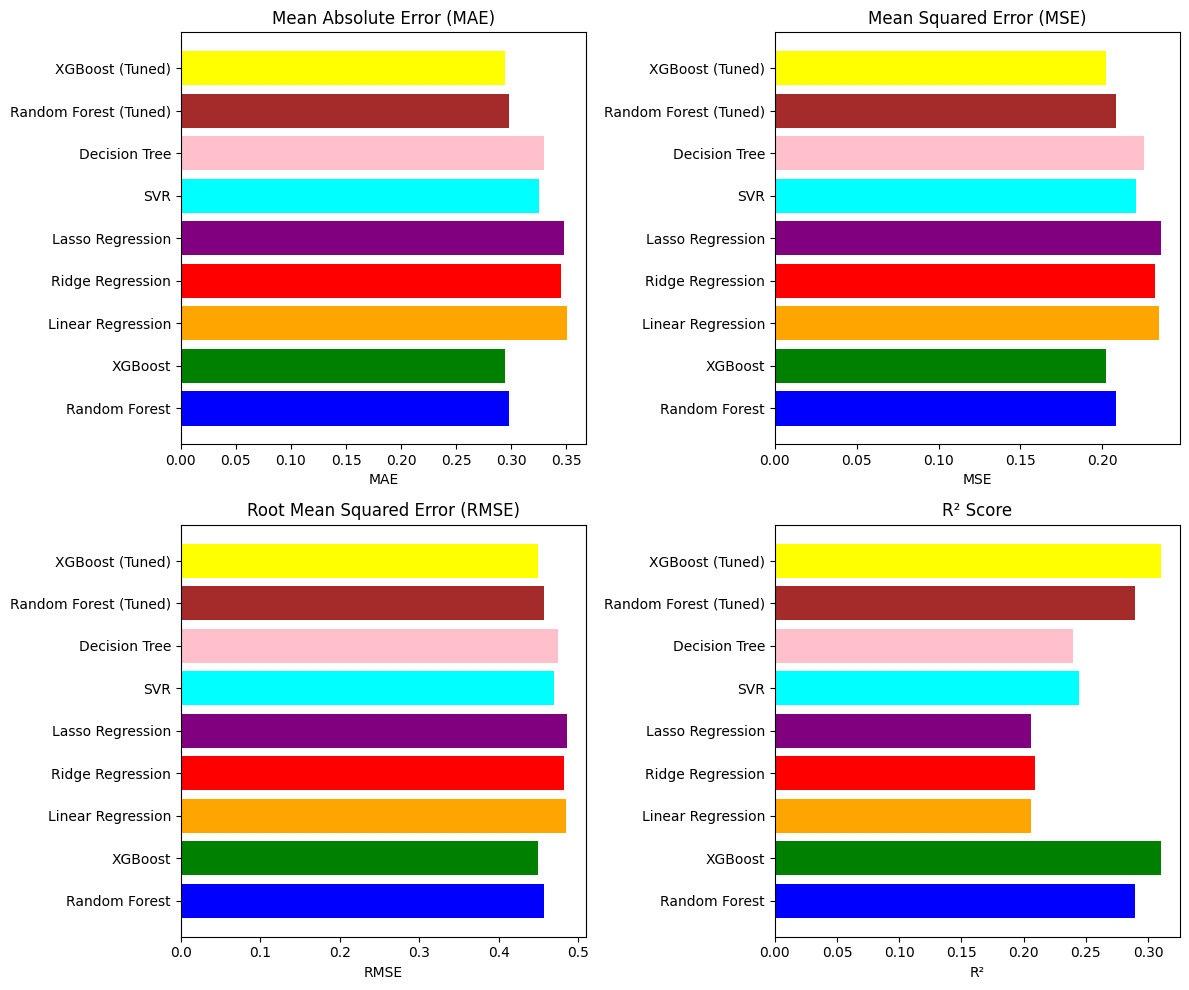

In [ ]:
# Define the models and their performance metrics
models = [
    'Random Forest', 'XGBoost', 'Linear Regression', 'Ridge Regression',
    'Lasso Regression', 'SVR', 'Decision Tree', 'Random Forest (Tuned)', 'XGBoost (Tuned)'
]

mae_scores = [
    0.2977, 0.2941, 0.3505, 0.3456, 0.3481, 0.3252, 0.3294, 0.2977, 0.2941  # Replace with actual MAE values
]

mse_scores = [
    0.2084, 0.2024, 0.2345, 0.2321, 0.2356, 0.2204, 0.2256, 0.2084, 0.2024  # Replace with actual MSE values
]

rmse_scores = [
    0.4565, 0.4499, 0.4848, 0.4816, 0.4856, 0.4697, 0.4743, 0.4565, 0.4499  # Replace with actual RMSE values
]

r2_scores = [
    0.2897, 0.3101, 0.2055, 0.2093, 0.2062, 0.2442, 0.2394, 0.2897, 0.3101  # Replace with actual R² values
]

# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R²': r2_scores
})

# Display the comparison table
print(comparison_df)

# Plotting the comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot MAE
axes[0, 0].barh(models, mae_scores, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'pink', 'brown', 'yellow'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_xlabel('MAE')

# Plot MSE
axes[0, 1].barh(models, mse_scores, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'pink', 'brown', 'yellow'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_xlabel('MSE')

# Plot RMSE
axes[1, 0].barh(models, rmse_scores, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'pink', 'brown', 'yellow'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_xlabel('RMSE')

# Plot R² Score
axes[1, 1].barh(models, r2_scores, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'pink', 'brown', 'yellow'])
axes[1, 1].set_title('R² Score')
axes[1, 1].set_xlabel('R²')

plt.tight_layout()
plt.show()


### Based on the evaluation metrics (MAE, MSE, RMSE, and R²), XGBoost (Basic & Tuned) is the best-performing model for this task. It outperforms all other models in all metrics, achieving the lowest error values and the highest R² score. Therefore, XGBoost is the most suitable model for predicting the target variable in this scenario.







